### Import data and libraries

In [92]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import ANN_pkg_2
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

### DATA PREPARATION 

In [93]:
df = pd.read_excel('mtnd.xlsx').values
# df.head(5)

In [94]:
df.shape

(169, 35)

In [95]:
X = df[:, 4:]
y = df[:, 1:4]
#Scale concentration columns
y = y / 10

In [96]:
np.mean(y, axis=0)

array([1.46366864, 1.51242604, 1.28662722])

#### Train test split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [98]:
# pd.DataFrame(y_test.T, columns= ["Guaifenesin", "Terbutaline sulfate", "Natri benzoate"]).to_excel("test_data.xlsx")

In [99]:
y_train.shape

(135, 3)

In [100]:
# Run standardization on X variables
from sklearn.preprocessing import scale 
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)

In [101]:
X_test

array([[0.212, 0.214, 0.217, ..., 0.26 , 0.229, 0.198],
       [0.202, 0.203, 0.205, ..., 0.229, 0.206, 0.181],
       [0.24 , 0.249, 0.261, ..., 0.349, 0.287, 0.229],
       ...,
       [0.142, 0.147, 0.153, ..., 0.18 , 0.146, 0.118],
       [0.2  , 0.202, 0.205, ..., 0.18 , 0.149, 0.123],
       [0.125, 0.131, 0.139, ..., 0.177, 0.147, 0.121]])

___
### Principal Components Regression

#### Evaluate for different number of principal components

In [102]:
rmse_list = []
R2_list = []

In [103]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(135, 31)

In [104]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:2,:]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.167061,0.316580,-0.343716,-0.478789,-0.193773,0.078644,-0.184004,0.272184,-0.003347,-0.293400,...,0.050086,-0.036114,0.009773,0.023844,0.000006,0.031590,0.008048,0.097279,0.011032,-0.020416
1,-0.170979,0.287177,-0.290011,-0.266302,-0.045809,0.073826,-0.015042,-0.043469,0.234775,0.548707,...,0.061963,0.027241,0.018302,-0.002201,0.027917,-0.045213,0.033104,-0.079480,-0.050264,0.009092
2,-0.174443,0.255911,-0.234626,-0.085227,0.047237,0.076575,0.085453,-0.053345,-0.074462,-0.084253,...,-0.054813,-0.007039,0.023995,-0.021622,-0.029274,-0.017107,-0.021178,-0.048652,0.061834,0.029429


In [105]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    # rmse_score = -1 * cross_val_score(lin_reg, 
    #                                   X_train_pc[:,:i], # Use first k principal components
    #                                   y_train, 
    #                                   cv=cv, 
    #                                   scoring='neg_mean_squared_error').mean()
    # rmse_list.append(rmse_score)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_pc[:, :i], y_train)
    y_pred = lin_reg.predict(X_train_pc[:, :i])
    rmse_list.append(np.sqrt(np.sum(np.square(y_pred - y_train), axis=0) / y_train.shape[0]))
    R2_list.append(r2_score(y_train, y_pred))

In [106]:
rmse_list=np.array(rmse_list)
R2_list = np.array(R2_list).reshape(-1,1)
rmse_list.shape

(31, 3)

In [107]:
R2_list[6:,:].shape

(25, 1)

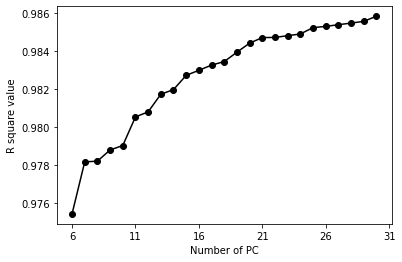

In [108]:
plt.plot(np.arange(6,31),R2_list[6:,:], "-o", color = "black")
plt.xticks(np.arange(6,32, 5))
plt.xlabel("Number of PC")
plt.ylabel("R square value")
plt.show()

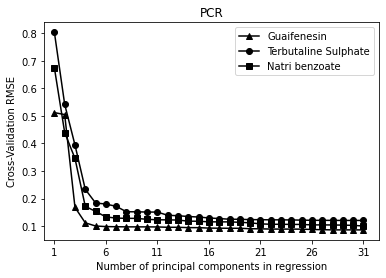

In [109]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list[:,0], '-^', label='Guaifenesin', color='black')
plt.plot(rmse_list[:,1], '-o', label='Terbutaline Sulphate', color='black')
plt.plot(rmse_list[:,2], '-s', label='Natri benzoate', color='black')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
plt.xlim(xmin=-1)
plt.xticks(np.arange(X_train_pc.shape[1], step=5), np.arange(1, X_train_pc.shape[1]+1, step=5))
plt.legend()
plt.show()

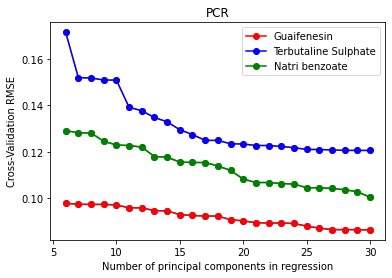

In [110]:
# Plot RMSE vs count of principal components used
plt.plot(np.arange(6, 31),rmse_list[6:,:], '-o')
plt.plot(np.arange(6, 31),rmse_list[6:,0], '-o', label='Guaifenesin', color='red')
plt.plot(np.arange(6, 31),rmse_list[6:,1], '-o', label='Terbutaline Sulphate', color='blue')
plt.plot(np.arange(6, 31),rmse_list[6:,2], '-o', label='Natri benzoate', color='Green')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('PCR')
# plt.xticks(np.arange(6, 31, step=5))
plt.legend()
# plt.xticks(np.arange(X_train_pc.shape[1] - 6), np.arange(1, X_train_pc.shape[1] - 6))
plt.show()

In [111]:
rmse_list = rmse_list.mean(axis=1)

In [112]:
(value,min_index) = min((v,i) for i,v in enumerate(list(rmse_list)))
value, min_index

(0.10233513544248352, 30)

In [113]:
# Visually determine optimal number of principal components
best_pc_num = min_index + 1

#### Predict

In [114]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [115]:
# R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.9858404098088469

In [116]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(34, 31)

In [117]:
# Predict on test data
PCR_preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = np.sqrt(np.sum(np.square(PCR_preds - y_test), axis=0) / y_train.shape[0])
pcr_score_test.mean()

0.14972984141834858

In [118]:
r2_score(y_test, PCR_preds)

0.8689620122984388

In [119]:
# preds = lin_reg_pc.predict(X_train_pc)
# pcr_score_train = np.sqrt(np.sum(np.square(preds - y_test), axis=0) / y_train.shape[0])
# pcr_score_train.mean()

In [120]:
# mauthuoc = pd.read_excel("mauthuoc.xlsx")
# mauthuoc = scale(mauthuoc.iloc[:,1:].values)
# mauthuoc = pca.fit_transform(mauthuoc)
# # lin_reg_pc.predict(mauthuoc)
# mauthuoc.shape

## ANN IMPLEMENT

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
X_val = X_val.T
y_val = y_val.T


In [122]:
# model = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)
model = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU)

In [123]:
epochs = 230000

In [124]:
model.fit(X_train, y_train, X_val, y_val, learning_rate = 0.04, alpha = 0, epochs = epochs, lr_down=True, lr_decay=100)


Loading 10.0%
Loading 20.0%
Loading 30.0%
Loading 40.0%
Loading 50.0%
Loading 60.0%
Loading 70.0%
Loading 80.0%
Loading 90.0%
Loading 100.0%
Learning process completed!!!


In [125]:
pd.DataFrame()

""


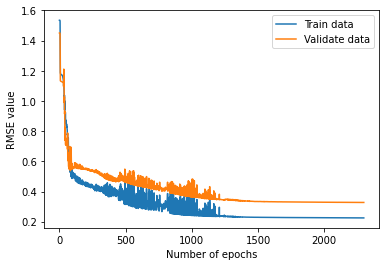

In [126]:
plt.plot(np.sqrt(model.cost_his), label = "Train data")
plt.plot(np.sqrt(model.test_cost_his), label = "Validate data")
# plt.xticks(np.arange(epo))
plt.xlabel("Number of epochs")  
plt.ylabel("RMSE value")
plt.legend(loc="upper right")

In [127]:
print(np.sqrt(model.cost_his[-1]))
print(np.sqrt(model.test_cost_his[-1]))

0.22492798547048679
0.3274851838530633


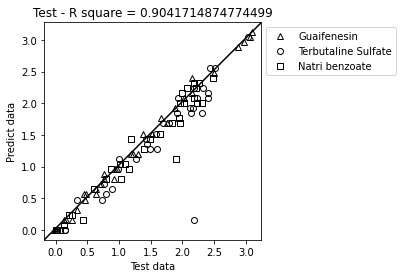

In [128]:
ANN_pred = model.forward(X_test)
plt.plot(ANN_pred[0,:].T, y_test[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[1,:].T, y_test[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[2,:].T, y_test[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Test data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Test - R square = {r2_score(y_test.T, ANN_pred.T)}")
plt.show()

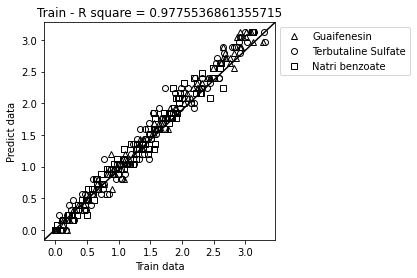

In [129]:
y_pred = model.forward(X_train)
# y_train.shape
plt.plot(y_pred[0,:].T, y_train[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_train[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_train[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Train data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Train - R square = {r2_score(y_train.T, y_pred.T)}")
plt.show()

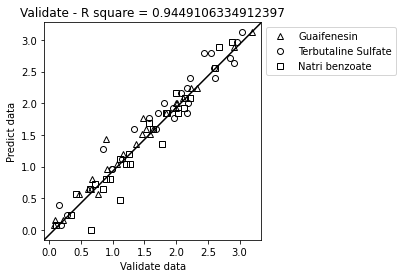

In [130]:
y_pred = model.forward(X_val)
# y_val.shape
plt.plot(y_pred[0,:].T, y_val[0,:].T, "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(y_pred[1,:].T, y_val[1,:].T, "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(y_pred[2,:].T, y_val[2,:].T, "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Validate data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Validate - R square = {r2_score(y_val.T, y_pred.T)}")
plt.show()

In [131]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = mauthuoc.iloc[:,1:].values / 10
mauthuoc = mauthuoc.T

In [132]:
model.forward(mauthuoc).T[:20, :] * 10
# GF: 33.25
# TBS: 0.75
# NaB: 5

array([[4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709],
       [4.18555825, 0.24022764, 1.14834709]])

In [133]:
df = np.concatenate([y_test.T[:20,:]*10, PCR_preds[:20,:]*10, ANN_pred.T[:20,:] * 10],axis=1)
# pd.DataFrame(df).to_excel("Mauthuc2.xlsx")
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8
0,8.0,25.6,20.0,10.989070,24.683757,21.801563,7.696417,25.135077,23.082590
1,5.6,18.4,20.8,8.119092,20.323229,20.171227,4.479608,21.279144,21.792595
2,29.6,1.6,11.2,32.766270,22.465135,18.748346,29.668340,21.865938,19.034990
3,20.8,12.8,14.4,23.695162,12.340803,14.355736,20.224122,15.947589,14.940774
4,0.0,0.0,0.0,3.159916,1.516749,-1.985880,0.166111,0.176588,0.183454
5,4.8,16.8,2.4,6.752762,21.221964,3.607982,4.633845,17.876479,2.130939
6,21.6,30.4,0.0,24.658491,30.321944,-0.447245,21.462574,30.311239,0.150031
7,24.8,25.6,20.0,27.412219,27.527115,22.322619,25.030033,24.338422,22.277313
8,0.0,0.0,0.0,2.144657,2.084344,0.348605,0.089131,0.222471,0.106090
9,30.4,6.4,10.4,33.015390,7.981194,13.928546,30.649956,8.871984,10.203887


In [134]:
# weights = pickle.load( open( 'weights.pkl' , 'rb' ))
# bias = pickle.load( open( 'bias.pkl' , 'rb' ))

In [135]:
# model2 = ANN_pkg_2.Neural_Network([X_train.shape[0],8, 8,y_train.shape[0]], ANN_pkg_2.ReLU, weights, bias)

In [136]:
# model2.forward(X_test).T * 10